## 0. Importing PyTorch and setting up device-agnostic code

## 1. Data Preparation 

In [102]:
# Set global random seeds for reproducibility
import torch
import numpy as np
import random

SEED = 100
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)


In [103]:
# Reproducibility: Set random seeds
import torch
import numpy as np
import random
from pathlib import Path
import os

SEED = 100
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# Check Dataset Paths and Contents
# Setup path to data folder
image_path = Path("asl_alphabet_train")
test_image_path = Path("asl_alphabet_test")

def walk_through_dir(dir_path):
    """Walks through dir_path returning its contents."""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

# Verify directories
walk_through_dir(image_path)
walk_through_dir(test_image_path)



There are 29 directories and 0 images in 'asl_alphabet_train'.
There are 0 directories and 4964 images in 'asl_alphabet_train/R'.
There are 0 directories and 4985 images in 'asl_alphabet_train/U'.
There are 0 directories and 4951 images in 'asl_alphabet_train/I'.
There are 0 directories and 4896 images in 'asl_alphabet_train/N'.
There are 0 directories and 4837 images in 'asl_alphabet_train/G'.
There are 0 directories and 4299 images in 'asl_alphabet_train/Z'.
There are 0 directories and 5036 images in 'asl_alphabet_train/T'.
There are 0 directories and 5054 images in 'asl_alphabet_train/S'.
There are 0 directories and 5458 images in 'asl_alphabet_train/A'.
There are 0 directories and 5029 images in 'asl_alphabet_train/F'.
There are 0 directories and 5096 images in 'asl_alphabet_train/O'.
There are 0 directories and 4897 images in 'asl_alphabet_train/H'.
There are 0 directories and 3742 images in 'asl_alphabet_train/del'.
There are 0 directories and 3030 images in 'asl_alphabet_train/n

## 2. Data Visualization

Random image path: ASL_Alphabet_Dataset/asl_alphabet_train/Z/Z2476.jpg
Image Class: Z
Image Height: 200
Image Width: 200


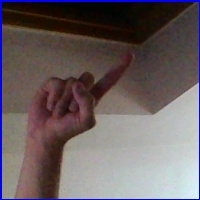

In [104]:
from pathlib import Path
import os
import random
from PIL import Image

# random.seed(42)
image_path = Path("ASL_Alphabet_Dataset")
image_path_list = list(image_path.glob("*/*/*.jpg"))
# print(len(image_path_list))
random_image_path = random.choice(image_path_list)
# print(random_image_path)
# the image class is the name of the directory where iamges resides
image_class = random_image_path.parent.stem
# print(image_class)

img = Image.open(random_image_path)

# Print metadata
print(f'Random image path: {random_image_path}')
print(f'Image Class: {image_class}')
print(f'Image Height: {img.height}')
print(f'Image Width: {img.width}')
img

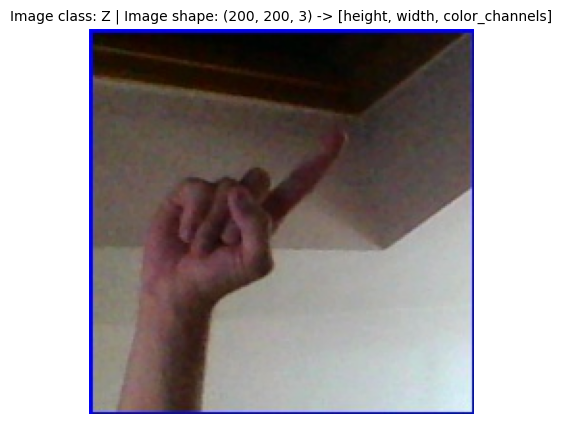

In [105]:
# Visualizing using matplotliib
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
fig = plt.figure(figsize=(6, 5))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]", fontsize = 10)
plt.axis(False)
plt.show()

In [106]:
img_as_array

array([[[  0,   7, 247],
        [  0,   4, 246],
        [  6,   1, 253],
        ...,
        [  7,   0, 243],
        [  3,   2, 244],
        [  0,   1, 242]],

       [[  0,   6, 245],
        [  0,   5, 233],
        [  8,   3, 209],
        ...,
        [ 12,   6, 194],
        [  7,   5, 212],
        [  6,   5, 221]],

       [[  0,   3, 240],
        [  5,   4, 202],
        [  1,   0, 114],
        ...,
        [ 61,  57, 134],
        [ 45,  41, 177],
        [ 13,  11, 174]],

       ...,

       [[  6,   0, 244],
        [ 12,   8, 191],
        [139, 139, 203],
        ...,
        [215, 242, 255],
        [212, 230, 255],
        [  4,  18, 151]],

       [[  1,   0, 248],
        [  7,   5, 212],
        [132, 132, 255],
        ...,
        [215, 233, 255],
        [214, 227, 255],
        [  0,  13, 171]],

       [[  1,   0, 251],
        [  6,   5, 223],
        [ 10,   9, 162],
        ...,
        [  4,  19, 148],
        [  2,  12, 171],
        [  4,  15, 185]]

## 3. Transforming data

In [107]:
!pip3 install torchvision

In [108]:
# Dataset Initialization
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Define transforms for dataset
transform = transforms.Compose([
    transforms.Grayscale(),         # Convert to grayscale
    transforms.Resize((128, 128)),    # Resize to 128x128 pixels
    transforms.ToTensor(),          # Convert to tensor
    transforms.Normalize([0.5], [0.5])  # Normalize to [-1, 1]
])

# Initialize dataset
dataset = datasets.ImageFolder(root='asl_alphabet_train', transform=transform)

# Split dataset into training and validation sets
train_ratio = 0.8
val_ratio = 1 - train_ratio
train_set, val_set = random_split(
    dataset,
    [train_ratio, val_ratio],
    generator=torch.Generator().manual_seed(SEED)
)

# Dataloaders
batch_size = 128
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False)


## 4. Loading data with ImageFolder and Split into Train and Test Data

In [109]:
# Setup source directory
source_dir = 'asl_alphabet_train'

source_data = datasets.ImageFolder(root = source_dir,
                                  transform = transform, # Transforms input data into tensors
                                  target_transform = None)    # Transform labels into none

source_data

Dataset ImageFolder
    Number of datapoints: 138118
    Root location: asl_alphabet_train
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=1)
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.5], std=[0.5])
           )

In [110]:
from torch.utils.data import random_split

train_size = int(0.8 * len(source_data))
test_size = len(source_data) - train_size

# Split the dataset into train and test sets
train_data, test_data = random_split(source_data, [train_size, test_size])

print(f"Train set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")

Train set size: 110494
Test set size: 27624


In [111]:
# Get class names as list and dict 
class_names = source_data.classes
class_dict = source_data.class_to_idx
class_dict

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'del': 26,
 'nothing': 27,
 'space': 28}

In [112]:
# Index on the train_data Dataset to get a single iamge and label
img, label = train_data[0][0], train_data[0][1]

img, img.dtype, label, type(label), class_names[label]

(tensor([[[-0.7569, -0.7725, -0.7725,  ..., -0.7647, -0.7725, -0.7647],
          [-0.7647, -0.4431, -0.3176,  ..., -0.4275, -0.4196, -0.6471],
          [-0.7647, -0.2784, -0.0902,  ..., -0.3961, -0.3804, -0.6078],
          ...,
          [-0.7804, -0.6941, -0.6784,  ..., -0.0902, -0.0902, -0.4980],
          [-0.7725, -0.7412, -0.7882,  ..., -0.0824, -0.0745, -0.4980],
          [-0.7647, -0.7804, -0.7882,  ..., -0.4980, -0.4980, -0.6627]]]),
 torch.float32,
 25,
 int,
 'Z')

In [113]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)
img.shape, img_permute.shape

(torch.Size([1, 128, 128]), torch.Size([128, 128, 1]))

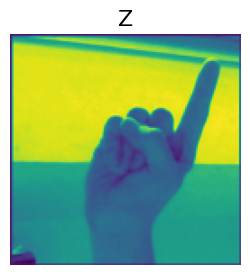

In [114]:
# Plot the image
plt.figure(figsize = (3, 3))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize = 16); 

## 5. Turn loaded images into Dataloaders

In [115]:
# Train and test dataloaders
from torch.utils.data import DataLoader

BATCH_SIZE = 128
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              num_workers = 1,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             num_workers = 1,
                             shuffle = False)

len(train_dataloader), len(test_dataloader)

(864, 216)

In [116]:
img, label = next(iter(train_dataloader))

img.shape, label.shape     # {img.shape} -> [batch_size, color_channels, height, width]

(torch.Size([128, 1, 128, 128]), torch.Size([128]))

In [117]:
!pip3 install torch

## 6. Transfer Learning using `MLP`

In [118]:
import torch.nn as nn

class MLPModel(nn.Module):
    def __init__(self, input_size, num_classes, dropout_prob=0.5):
        super(MLPModel, self).__init__()
        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(input_size, 1024)
        self.dropout1 = nn.Dropout(p=dropout_prob)  # Dropout after layer 1
        self.layer2 = nn.Linear(1024, 512)
        self.dropout2 = nn.Dropout(p=dropout_prob)  # Dropout after layer 2
        self.layer3 = nn.Linear(512, 256)
        self.dropout3 = nn.Dropout(p=dropout_prob)  # Dropout after layer 3
        self.layer4 = nn.Linear(256, 128)
        self.dropout4 = nn.Dropout(p=dropout_prob)  # Dropout after layer 4
        self.layer5 = nn.Linear(128, 64)  # New hidden layer
        self.dropout5 = nn.Dropout(p=dropout_prob)  # Dropout after layer 5
        self.layer6 = nn.Linear(64, 32)  # New hidden layer
        self.dropout6 = nn.Dropout(p=dropout_prob)  # Dropout after layer 6
        self.layer7 = nn.Linear(32, 16)  # New hidden layer
        self.dropout7 = nn.Dropout(p=dropout_prob)  # Dropout after layer 7
        self.output = nn.Linear(16, num_classes)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.layer1(x))
        x = self.dropout1(x)  # Apply dropout after ReLU
        x = torch.relu(self.layer2(x))
        x = self.dropout2(x)  # Apply dropout after ReLU
        x = torch.relu(self.layer3(x))
        x = self.dropout3(x)  # Apply dropout after ReLU
        x = torch.relu(self.layer4(x))  # Activation for the new layer
        x = self.dropout4(x)  # Apply dropout after ReLU
        x = torch.relu(self.layer5(x))  # Activation for the new layer
        x = self.dropout5(x)  # Apply dropout after ReLU
        x = torch.relu(self.layer6(x))  # Activation for the new layer
        x = self.dropout6(x)  # Apply dropout after ReLU
        x = torch.relu(self.layer7(x))  # Activation for the new layer
        x = self.dropout7(x)  # Apply dropout after ReLU
        x = self.output(x)
        return x

# Define input size and number of classes based on ASL dataset
input_size = 128 * 128  # Flattened image size (128x128 pixels assumed)
num_classes = 29        # Adjusted for ASL alphabet categories

# Instantiate model
model = MLPModel(input_size=input_size, num_classes=num_classes, dropout_prob=0.3)
print(model)


MLPModel(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=16384, out_features=1024, bias=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (layer2): Linear(in_features=1024, out_features=512, bias=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (layer3): Linear(in_features=512, out_features=256, bias=True)
  (dropout3): Dropout(p=0.3, inplace=False)
  (layer4): Linear(in_features=256, out_features=128, bias=True)
  (dropout4): Dropout(p=0.3, inplace=False)
  (layer5): Linear(in_features=128, out_features=64, bias=True)
  (dropout5): Dropout(p=0.3, inplace=False)
  (layer6): Linear(in_features=64, out_features=32, bias=True)
  (dropout6): Dropout(p=0.3, inplace=False)
  (layer7): Linear(in_features=32, out_features=16, bias=True)
  (dropout7): Dropout(p=0.3, inplace=False)
  (output): Linear(in_features=16, out_features=29, bias=True)
)


In [119]:
import torch
from PIL import Image
from torchvision import transforms

# Set device to GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the device
model = model.to(device)

# Ensure the input image tensor is also on the same device
model(img.to(device))



tensor([[ 0.1443, -0.0899,  0.2413,  ..., -0.0191, -0.0323, -0.0495],
        [ 0.1594, -0.1280,  0.2556,  ...,  0.0431, -0.1092, -0.0536],
        [ 0.1878, -0.1424,  0.2574,  ...,  0.0254,  0.0262, -0.0049],
        ...,
        [ 0.1697, -0.1245,  0.2709,  ...,  0.0121,  0.0044, -0.0018],
        [ 0.1830, -0.1275,  0.2676,  ...,  0.0194,  0.0300,  0.0069],
        [ 0.1175, -0.1341,  0.2489,  ..., -0.0155, -0.0878, -0.0497]],
       grad_fn=<AddmmBackward0>)

## 7. Create Train/Test Loop Function

In [120]:
def train_step(model, dataloader, loss_fn, optimizer):
    model.train()
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

def test_step(model, dataloader, loss_fn):
    model.eval()
    test_loss, test_acc = 0, 0

    # Turn on inference
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            test_pred_logits = model(X)
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [121]:
!pip3 install tqdm


In [122]:
from tqdm.auto import tqdm

def train(model, train_dataloader, test_dataloader, optimizer, loss_fn, epochs):

  # Create a empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss":[],
             "test_acc": []}

  # Loop through training and testing steps for no of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model = model,
                                       dataloader = train_dataloader,
                                       optimizer = optimizer,
                                       loss_fn = loss_fn)

    test_loss, test_acc = test_step(model = model,
                                     dataloader = test_dataloader,
                                     loss_fn = loss_fn)

    print(f'Epoch: {epoch} | Train loss: {train_loss:.4f} - Train acc: {(train_acc*100):.2f}% -  Test loss: {test_loss:.4f} - Test acc: {(test_acc*100):.2f}%')

    # Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results

## 8. Train and Evaluate the Model

In [123]:
# Setup loss functions and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr=0.001, weight_decay=0.0001)

In [124]:
# Set random seed
#torch.manual_seed(42)
EPOCHS = 50

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model
model_results = train(model = model,
                      train_dataloader = train_dataloader,
                      test_dataloader = test_dataloader,
                      optimizer = optimizer,
                      loss_fn = loss_fn,
                      epochs = EPOCHS)

# End the timer and print duration of training
end_time = timer()
print(f'Total Train Time: {end_time - start_time:.3f} seconds')

  2%|▏         | 1/50 [02:17<1:52:23, 137.62s/it]

Epoch: 0 | Train loss: 3.2187 - Train acc: 6.48% -  Test loss: 2.8747 - Test acc: 10.76%


  4%|▍         | 2/50 [04:32<1:48:56, 136.18s/it]

Epoch: 1 | Train loss: 2.8712 - Train acc: 11.18% -  Test loss: 2.6196 - Test acc: 15.61%


  6%|▌         | 3/50 [06:47<1:46:13, 135.60s/it]

Epoch: 2 | Train loss: 2.7217 - Train acc: 13.86% -  Test loss: 2.5185 - Test acc: 17.33%


  8%|▊         | 4/50 [09:02<1:43:49, 135.43s/it]

Epoch: 3 | Train loss: 2.6420 - Train acc: 15.68% -  Test loss: 2.4086 - Test acc: 20.12%


 10%|█         | 5/50 [11:17<1:41:28, 135.29s/it]

Epoch: 4 | Train loss: 2.5714 - Train acc: 17.42% -  Test loss: 2.3992 - Test acc: 21.25%


 12%|█▏        | 6/50 [13:33<1:39:13, 135.30s/it]

Epoch: 5 | Train loss: 2.5339 - Train acc: 18.45% -  Test loss: 2.2133 - Test acc: 25.29%


 14%|█▍        | 7/50 [15:48<1:37:03, 135.42s/it]

Epoch: 6 | Train loss: 2.4701 - Train acc: 20.37% -  Test loss: 2.1595 - Test acc: 28.78%


 16%|█▌        | 8/50 [18:04<1:34:45, 135.36s/it]

Epoch: 7 | Train loss: 2.4157 - Train acc: 22.13% -  Test loss: 2.0589 - Test acc: 30.99%


 18%|█▊        | 9/50 [20:18<1:32:20, 135.14s/it]

Epoch: 8 | Train loss: 2.3639 - Train acc: 23.60% -  Test loss: 2.0679 - Test acc: 31.54%


 20%|██        | 10/50 [22:31<1:29:37, 134.43s/it]

Epoch: 9 | Train loss: 2.3375 - Train acc: 24.53% -  Test loss: 1.9807 - Test acc: 34.02%


 22%|██▏       | 11/50 [24:44<1:27:02, 133.91s/it]

Epoch: 10 | Train loss: 2.3081 - Train acc: 25.32% -  Test loss: 1.9586 - Test acc: 34.83%


 24%|██▍       | 12/50 [26:57<1:24:41, 133.73s/it]

Epoch: 11 | Train loss: 2.3023 - Train acc: 25.50% -  Test loss: 1.9032 - Test acc: 35.16%


 26%|██▌       | 13/50 [29:11<1:22:27, 133.71s/it]

Epoch: 12 | Train loss: 2.2769 - Train acc: 26.19% -  Test loss: 1.8936 - Test acc: 36.90%


 28%|██▊       | 14/50 [31:24<1:20:02, 133.40s/it]

Epoch: 13 | Train loss: 2.2534 - Train acc: 26.85% -  Test loss: 1.8791 - Test acc: 36.53%


 30%|███       | 15/50 [33:37<1:17:45, 133.30s/it]

Epoch: 14 | Train loss: 2.2476 - Train acc: 26.92% -  Test loss: 1.8294 - Test acc: 38.27%


 32%|███▏      | 16/50 [35:50<1:15:32, 133.30s/it]

Epoch: 15 | Train loss: 2.2210 - Train acc: 27.71% -  Test loss: 1.9086 - Test acc: 36.42%


 34%|███▍      | 17/50 [38:03<1:13:18, 133.29s/it]

Epoch: 16 | Train loss: 2.2379 - Train acc: 27.60% -  Test loss: 1.8112 - Test acc: 37.98%


 36%|███▌      | 18/50 [40:16<1:10:57, 133.04s/it]

Epoch: 17 | Train loss: 2.2072 - Train acc: 28.20% -  Test loss: 1.8504 - Test acc: 38.04%


 38%|███▊      | 19/50 [42:28<1:08:38, 132.85s/it]

Epoch: 18 | Train loss: 2.2094 - Train acc: 28.21% -  Test loss: 1.7945 - Test acc: 38.19%


 40%|████      | 20/50 [44:40<1:06:21, 132.73s/it]

Epoch: 19 | Train loss: 2.1809 - Train acc: 28.72% -  Test loss: 1.7960 - Test acc: 37.80%


 42%|████▏     | 21/50 [46:53<1:04:11, 132.80s/it]

Epoch: 20 | Train loss: 2.1813 - Train acc: 28.94% -  Test loss: 1.8442 - Test acc: 37.90%


 44%|████▍     | 22/50 [49:06<1:01:52, 132.60s/it]

Epoch: 21 | Train loss: 2.1750 - Train acc: 29.12% -  Test loss: 1.8483 - Test acc: 36.75%


 46%|████▌     | 23/50 [51:19<59:43, 132.74s/it]  

Epoch: 22 | Train loss: 2.1784 - Train acc: 29.17% -  Test loss: 1.7751 - Test acc: 40.12%


 48%|████▊     | 24/50 [53:31<57:27, 132.60s/it]

Epoch: 23 | Train loss: 2.1806 - Train acc: 29.22% -  Test loss: 1.7621 - Test acc: 40.72%


 50%|█████     | 25/50 [55:44<55:18, 132.75s/it]

Epoch: 24 | Train loss: 2.1694 - Train acc: 29.80% -  Test loss: 1.7535 - Test acc: 40.79%


 52%|█████▏    | 26/50 [57:56<53:02, 132.59s/it]

Epoch: 25 | Train loss: 2.1817 - Train acc: 29.48% -  Test loss: 1.8117 - Test acc: 40.01%


 54%|█████▍    | 27/50 [1:00:09<50:52, 132.70s/it]

Epoch: 26 | Train loss: 2.1672 - Train acc: 29.71% -  Test loss: 1.7232 - Test acc: 40.28%


 56%|█████▌    | 28/50 [1:02:21<48:33, 132.45s/it]

Epoch: 27 | Train loss: 2.1569 - Train acc: 29.72% -  Test loss: 1.7825 - Test acc: 38.40%


 58%|█████▊    | 29/50 [1:04:33<46:18, 132.30s/it]

Epoch: 28 | Train loss: 2.1547 - Train acc: 30.04% -  Test loss: 1.7577 - Test acc: 40.84%


 60%|██████    | 30/50 [1:06:45<44:02, 132.15s/it]

Epoch: 29 | Train loss: 2.1452 - Train acc: 30.22% -  Test loss: 1.7269 - Test acc: 40.77%


 62%|██████▏   | 31/50 [1:08:57<41:51, 132.18s/it]

Epoch: 30 | Train loss: 2.1244 - Train acc: 30.84% -  Test loss: 1.6719 - Test acc: 43.22%


 64%|██████▍   | 32/50 [1:11:10<39:42, 132.34s/it]

Epoch: 31 | Train loss: 2.1465 - Train acc: 30.71% -  Test loss: 1.6920 - Test acc: 41.68%


 66%|██████▌   | 33/50 [1:13:23<37:32, 132.51s/it]

Epoch: 32 | Train loss: 2.1057 - Train acc: 31.31% -  Test loss: 1.7168 - Test acc: 41.69%


 68%|██████▊   | 34/50 [1:15:35<35:17, 132.32s/it]

Epoch: 33 | Train loss: 2.1219 - Train acc: 31.21% -  Test loss: 1.7187 - Test acc: 42.38%


 70%|███████   | 35/50 [1:17:47<33:05, 132.39s/it]

Epoch: 34 | Train loss: 2.1451 - Train acc: 30.64% -  Test loss: 1.7198 - Test acc: 41.51%


 72%|███████▏  | 36/50 [1:20:00<30:54, 132.45s/it]

Epoch: 35 | Train loss: 2.1292 - Train acc: 31.03% -  Test loss: 1.7110 - Test acc: 40.26%


 74%|███████▍  | 37/50 [1:22:12<28:41, 132.42s/it]

Epoch: 36 | Train loss: 2.1281 - Train acc: 31.24% -  Test loss: 1.6833 - Test acc: 43.38%


 76%|███████▌  | 38/50 [1:24:24<26:28, 132.41s/it]

Epoch: 37 | Train loss: 2.1126 - Train acc: 31.42% -  Test loss: 1.7771 - Test acc: 40.04%


 78%|███████▊  | 39/50 [1:26:38<24:21, 132.83s/it]

Epoch: 38 | Train loss: 2.1411 - Train acc: 31.08% -  Test loss: 1.6506 - Test acc: 44.51%


 80%|████████  | 40/50 [1:28:51<22:08, 132.87s/it]

Epoch: 39 | Train loss: 2.1145 - Train acc: 31.77% -  Test loss: 1.6988 - Test acc: 41.92%


 82%|████████▏ | 41/50 [1:31:04<19:54, 132.71s/it]

Epoch: 40 | Train loss: 2.1131 - Train acc: 31.71% -  Test loss: 1.6742 - Test acc: 43.38%


 84%|████████▍ | 42/50 [1:33:16<17:40, 132.58s/it]

Epoch: 41 | Train loss: 2.1448 - Train acc: 31.22% -  Test loss: 1.6697 - Test acc: 44.02%


 86%|████████▌ | 43/50 [1:35:29<15:28, 132.69s/it]

Epoch: 42 | Train loss: 2.1008 - Train acc: 32.20% -  Test loss: 1.6546 - Test acc: 44.48%


 88%|████████▊ | 44/50 [1:37:40<13:14, 132.37s/it]

Epoch: 43 | Train loss: 2.1034 - Train acc: 32.13% -  Test loss: 1.7431 - Test acc: 40.59%


 90%|█████████ | 45/50 [1:39:53<11:02, 132.43s/it]

Epoch: 44 | Train loss: 2.1016 - Train acc: 32.19% -  Test loss: 1.5913 - Test acc: 45.10%


 92%|█████████▏| 46/50 [1:42:06<08:49, 132.46s/it]

Epoch: 45 | Train loss: 2.1074 - Train acc: 32.07% -  Test loss: 1.6435 - Test acc: 44.54%


 94%|█████████▍| 47/50 [1:44:18<06:37, 132.38s/it]

Epoch: 46 | Train loss: 2.1038 - Train acc: 32.21% -  Test loss: 1.6304 - Test acc: 43.73%


 96%|█████████▌| 48/50 [1:46:31<04:25, 132.66s/it]

Epoch: 47 | Train loss: 2.0782 - Train acc: 33.07% -  Test loss: 1.5962 - Test acc: 45.30%


 98%|█████████▊| 49/50 [1:48:43<02:12, 132.54s/it]

Epoch: 48 | Train loss: 2.1096 - Train acc: 32.34% -  Test loss: 1.5881 - Test acc: 43.84%


100%|██████████| 50/50 [1:50:56<00:00, 133.12s/it]

Epoch: 49 | Train loss: 2.0934 - Train acc: 32.72% -  Test loss: 1.6691 - Test acc: 42.81%
Total Train Time: 6656.239 seconds


## 9. Plot loss curves and accuracy curves

In [125]:
# Get the model key results
model_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [126]:
def plot_loss_curves(results):
    """ Plots training curves of a results dictionary """

    # Get results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    epochs = range(len(results['train_loss']))

    plt.figure(figsize=(15, 4))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

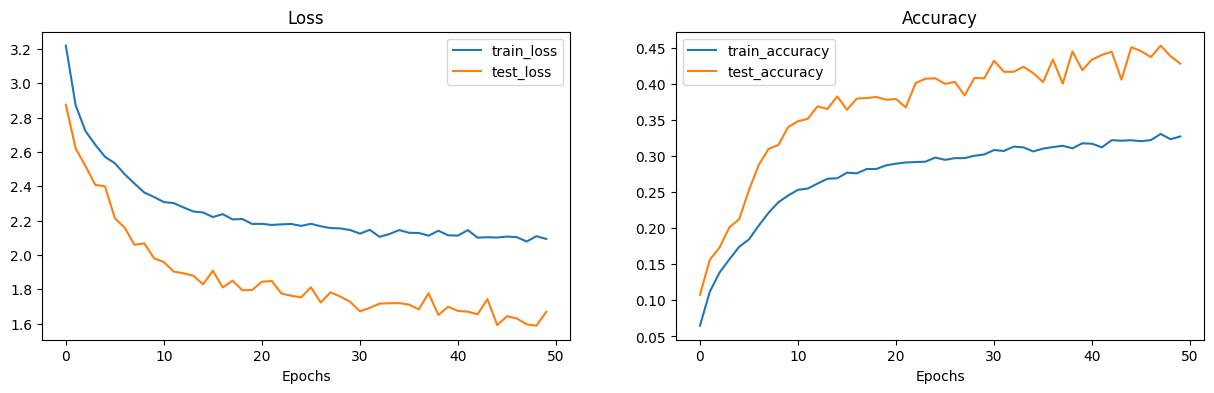

In [127]:
plot_loss_curves(model_results)

## 12. Making Predictions on Loaded Model

In [128]:
def make_predictions(model, data, device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim = 0).to(device)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [129]:
import random

# Set the number of samples to the smaller of 30 or the available dataset size
num_samples = min(30, len(test_data))

test_samples = []
test_labels = []

# Randomly sample from test_data
for sample, label in random.sample(list(test_data), k=num_samples):
    test_samples.append(sample)
    test_labels.append(label)


In [130]:
# Use the currently trained model
loaded_model = model
loaded_model.eval()  # Set to evaluation mode


MLPModel(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=16384, out_features=1024, bias=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (layer2): Linear(in_features=1024, out_features=512, bias=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (layer3): Linear(in_features=512, out_features=256, bias=True)
  (dropout3): Dropout(p=0.3, inplace=False)
  (layer4): Linear(in_features=256, out_features=128, bias=True)
  (dropout4): Dropout(p=0.3, inplace=False)
  (layer5): Linear(in_features=128, out_features=64, bias=True)
  (dropout5): Dropout(p=0.3, inplace=False)
  (layer6): Linear(in_features=64, out_features=32, bias=True)
  (dropout6): Dropout(p=0.3, inplace=False)
  (layer7): Linear(in_features=32, out_features=16, bias=True)
  (dropout7): Dropout(p=0.3, inplace=False)
  (output): Linear(in_features=16, out_features=29, bias=True)
)

In [131]:
def make_predictions(model, data, device):
    model.eval()
    data = data.to(device)
    with torch.no_grad():
        output = model(data)
    return output


In [132]:
# Stack list of individual samples into a single tensor
test_samples = torch.stack(test_samples).to(device)


In [133]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os

class ASLDataset(Dataset):
    def __init__(self, folder_path, transform=None):
        self.folder_path = folder_path
        self.image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = os.path.join(self.folder_path, self.image_files[idx])
        image = Image.open(img_name).convert("L")  # Convert to grayscale
        if self.transform:
            image = self.transform(image)
        return image, 0  # Return 0 as placeholder label

# Usage
test_data = ASLDataset("asl_alphabet_test", transform=transform)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)


In [134]:
def make_predictions(model, data_loader, device):
    model.eval()  # Set the model to evaluation mode
    all_pred_probs = []

    with torch.no_grad():  # Disable gradient tracking
        for data, _ in data_loader:  # Assuming data_loader provides (inputs, labels) pairs
            data = data.to(device)  # Move the batch of inputs to the device
            output = model(data)  # Forward pass
            all_pred_probs.append(output)  # Collect predictions

    # Concatenate all predictions into a single tensor
    return torch.cat(all_pred_probs)

# Example usage
loaded_pred_probs = make_predictions(loaded_model, test_loader, device)
loaded_pred_classes = loaded_pred_probs.argmax(dim=1)


IndexError: index 28 is out of bounds for dimension 0 with size 28

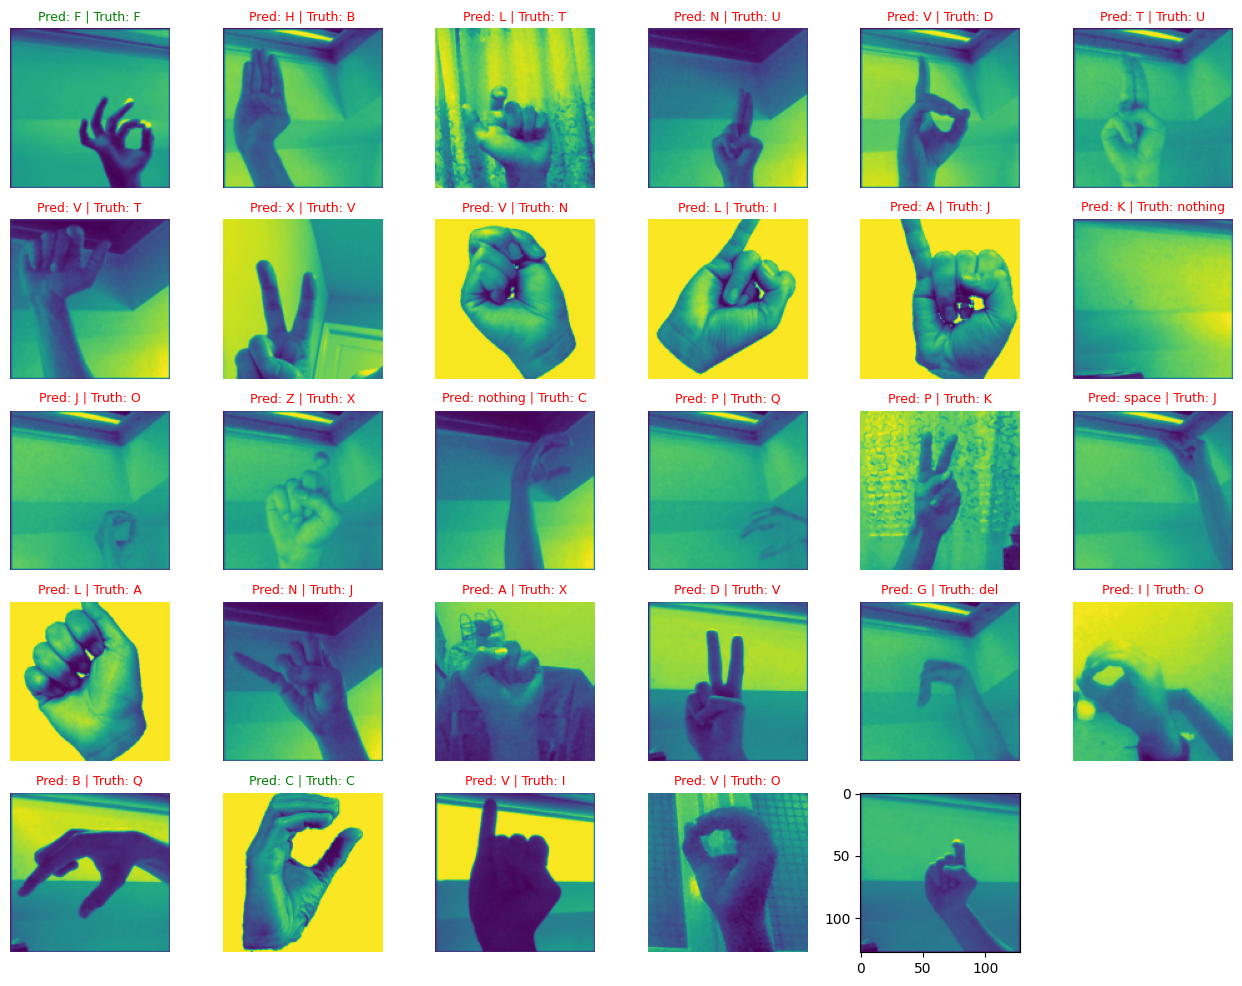

In [135]:
plt.figure(figsize=(16, 12))
nrows, ncols = 5, 6

for i, sample in enumerate(test_samples):
  class_name = np.array([
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
    'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 
    'del', 'nothing', 'space'
])

  plt.subplot(nrows, ncols, i + 1)
  normalized_sample = sample.permute(1, 2, 0).numpy()
  normalized_sample = normalized_sample / 255.0
  plt.imshow(normalized_sample)

  pred_label = class_name[loaded_pred_classes[i]]
  truth_label = class_name[test_labels[i]]
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"  
    
  if pred_label == truth_label:
      plt.title(title_text, fontsize=9, c="g")
  else:
      plt.title(title_text, fontsize=9, c="r")

  plt.axis(False);

In [ ]:
from sklearn.metrics import f1_score

def calculate_f1(pred_classes, true_labels):
    return f1_score(true_labels, pred_classes, average='weighted')  # For multi-class classification


In [ ]:
from sklearn.metrics import f1_score
import torch

def test_step_with_f1(model, dataloader, loss_fn, device):
    model.eval()
    all_preds = []
    all_labels = []

    # Turn on inference mode
    with torch.inference_mode():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)

            # Forward pass
            test_pred_logits = model(X)
            test_pred_labels = test_pred_logits.argmax(dim=1)
            
            # Collect all predictions and true labels
            all_preds.extend(test_pred_labels.cpu().numpy())
            all_labels.extend(y.cpu().numpy())

    # Calculate the F1 score
    f1 = f1_score(all_labels, all_preds, average='weighted')
    return f1

# Example usage (assuming `test_dataloader`, `model`, `loss_fn`, and `device` are defined):
f1_score_value = test_step_with_f1(model, test_dataloader, loss_fn, device)
print("F1 Score:", f1_score_value)


F1 Score: 0.586695549196594


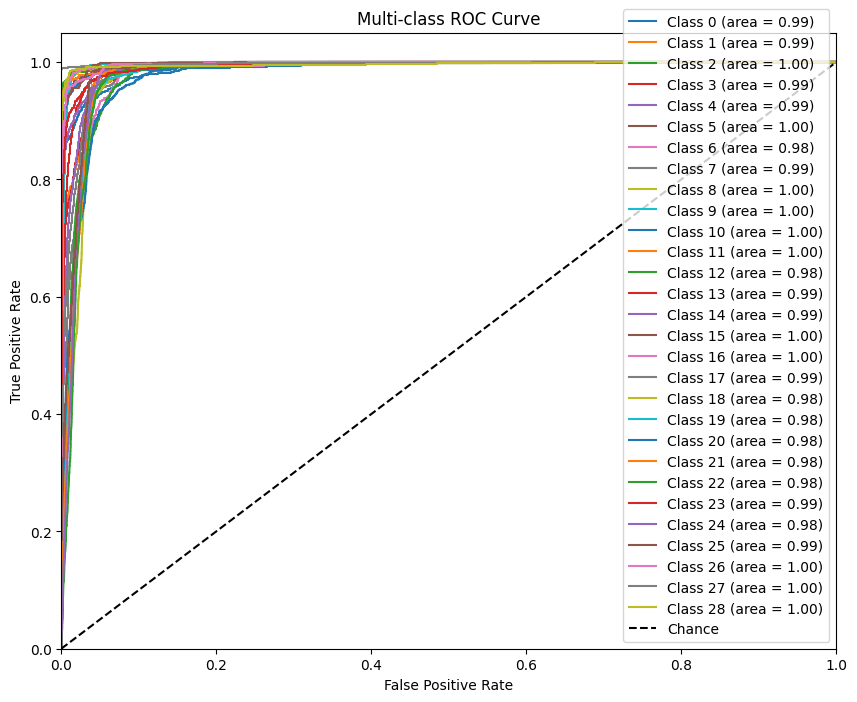

In [ ]:
import numpy as np
import torch
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_multiclass_roc(model, dataloader, device, n_classes):
    # Set the model to evaluation mode
    model.eval()
    
    # Collect predictions and true labels
    all_labels = []
    all_probs = []

    # Inference and data collection
    with torch.inference_mode():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            probs = torch.softmax(model(X), dim=1)  # Get probabilities
            all_probs.append(probs.cpu().numpy())
            all_labels.append(y.cpu().numpy())
    
    # Concatenate all predictions and labels
    all_labels = np.concatenate(all_labels)
    all_probs = np.concatenate(all_probs)
    
    # Binarize the labels for ROC curve calculation
    all_labels_binarized = label_binarize(all_labels, classes=np.arange(n_classes))
    
    # Plotting the ROC curve for each class
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(all_labels_binarized[:, i], all_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {i} (area = {roc_auc:.2f})")
    
    plt.plot([0, 1], [0, 1], 'k--', label='Chance')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Multi-class ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

# Example usage (assuming `model`, `test_dataloader`, `device`, and `n_classes` are defined):
plot_multiclass_roc(model, test_dataloader, device, n_classes=29)


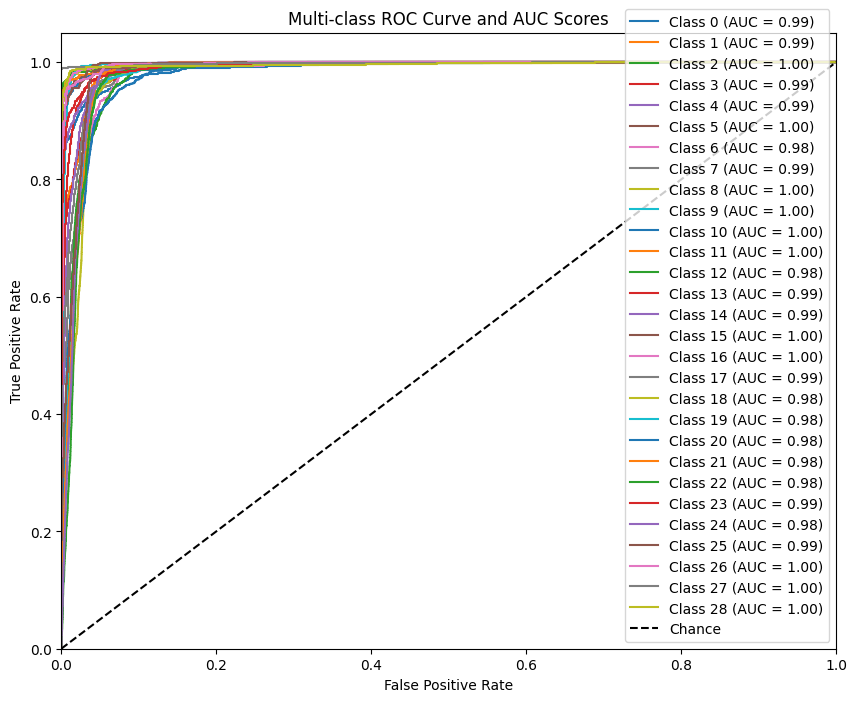

AUC Scores for each class:
Class 0: 0.99
Class 1: 0.99
Class 2: 1.00
Class 3: 0.99
Class 4: 0.99
Class 5: 1.00
Class 6: 0.98
Class 7: 0.99
Class 8: 1.00
Class 9: 1.00
Class 10: 1.00
Class 11: 1.00
Class 12: 0.98
Class 13: 0.99
Class 14: 0.99
Class 15: 1.00
Class 16: 1.00
Class 17: 0.99
Class 18: 0.98
Class 19: 0.98
Class 20: 0.98
Class 21: 0.98
Class 22: 0.98
Class 23: 0.99
Class 24: 0.98
Class 25: 0.99
Class 26: 1.00
Class 27: 1.00
Class 28: 1.00


In [ ]:
import numpy as np
import torch
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_multiclass_roc_and_auc(model, dataloader, device, n_classes):
    model.eval()
    all_labels = []
    all_probs = []

    # Collect predictions and true labels
    with torch.inference_mode():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            probs = torch.softmax(model(X), dim=1)  # Get probabilities
            all_probs.append(probs.cpu().numpy())
            all_labels.append(y.cpu().numpy())
    
    # Concatenate all predictions and labels
    all_labels = np.concatenate(all_labels)
    all_probs = np.concatenate(all_probs)
    
    # Binarize the labels for AUC and ROC calculation
    all_labels_binarized = label_binarize(all_labels, classes=np.arange(n_classes))
    
    # Dictionary to store AUC values
    auc_values = {}

    # Plotting the ROC curve for each class
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(all_labels_binarized[:, i], all_probs[:, i])
        roc_auc = auc(fpr, tpr)
        auc_values[f"Class {i}"] = roc_auc  # Store AUC value
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")
    
    plt.plot([0, 1], [0, 1], 'k--', label='Chance')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Multi-class ROC Curve and AUC Scores")
    plt.legend(loc="lower right")
    plt.show()

    # Print AUC values for each class
    print("AUC Scores for each class:")
    for class_label, auc_score in auc_values.items():
        print(f"{class_label}: {auc_score:.2f}")

# Example usage (assuming `model`, `test_dataloader`, `device`, and `n_classes` are defined):
plot_multiclass_roc_and_auc(model, test_dataloader, device, n_classes=29)


In [ ]:
from sklearn.metrics import recall_score
import torch

def calculate_recall(model, dataloader, device):
    model.eval()
    all_labels = []
    all_preds = []

    # Collect predictions and true labels
    with torch.inference_mode():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            preds = model(X).argmax(dim=1)  # Get predicted labels
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y.cpu().numpy())
    
    # Calculate recall for each class
    recall_per_class = recall_score(all_labels, all_preds, average=None)
    recall_macro = recall_score(all_labels, all_preds, average='macro')
    recall_weighted = recall_score(all_labels, all_preds, average='weighted')

    # Print recall values
    print("Recall per class:", recall_per_class)
    print(f"Macro-average Recall: {recall_macro:.2f}")
    print(f"Weighted-average Recall: {recall_weighted:.2f}")

# Example usage (assuming `model`, `test_dataloader`, and `device` are defined):
calculate_recall(model, test_dataloader, device)


Recall per class: [0.57542909 0.89173789 0.79959718 0.64476615 0.44888889 0.47477745
 0.39816701 0.65719882 0.59171598 0.88436831 0.7020202  0.80377358
 0.1765286  0.71725572 0.74193548 0.69055375 0.92433538 0.25106838
 0.18101761 0.64439877 0.63173653 0.         0.53938731 0.52228682
 0.66306483 0.44202899 0.57965194 0.97310924 0.74623116]
Macro-average Recall: 0.60
Weighted-average Recall: 0.59


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
import torch

def calculate_metrics(model, dataloader, device):
    model.eval()
    all_labels = []
    all_preds = []

    # Collect predictions and true labels
    with torch.inference_mode():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            preds = model(X).argmax(dim=1)  # Get predicted labels
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y.cpu().numpy())
    
    # Calculate precision, recall, and accuracy
    precision_per_class = precision_score(all_labels, all_preds, average=None)
    precision_macro = precision_score(all_labels, all_preds, average='macro')
    precision_weighted = precision_score(all_labels, all_preds, average='weighted')

    recall_per_class = recall_score(all_labels, all_preds, average=None)
    recall_macro = recall_score(all_labels, all_preds, average='macro')
    recall_weighted = recall_score(all_labels, all_preds, average='weighted')

    accuracy = accuracy_score(all_labels, all_preds)

    # Print precision, recall, and accuracy values
    print("Precision per class:", precision_per_class)
    print(f"Macro-average Precision: {precision_macro:.2f}")
    print(f"Weighted-average Precision: {precision_weighted:.2f}")
    
    print("Recall per class:", recall_per_class)
    print(f"Macro-average Recall: {recall_macro:.2f}")
    print(f"Weighted-average Recall: {recall_weighted:.2f}")

    print(f"Overall Accuracy: {accuracy:.2f}")

# Example usage (assuming `model`, `test_dataloader`, and `device` are defined):
calculate_metrics(model, test_dataloader, device)


Precision per class: [0.75117925 0.31268731 0.89414414 0.68358914 0.81616162 0.93933464
 0.50128205 0.59538598 0.93312597 0.58498584 0.63996317 0.935236
 0.55590062 0.61278863 0.47319202 0.91642651 0.75396163 0.49369748
 0.61258278 0.45699708 0.27666084 0.         0.34742777 0.53472222
 0.6343985  0.98387097 0.98185941 1.         0.74157303]
Macro-average Precision: 0.65
Weighted-average Precision: 0.65
Recall per class: [0.57542909 0.89173789 0.79959718 0.64476615 0.44888889 0.47477745
 0.39816701 0.65719882 0.59171598 0.88436831 0.7020202  0.80377358
 0.1765286  0.71725572 0.74193548 0.69055375 0.92433538 0.25106838
 0.18101761 0.64439877 0.63173653 0.         0.53938731 0.52228682
 0.66306483 0.44202899 0.57965194 0.97310924 0.74623116]
Macro-average Recall: 0.60
Weighted-average Recall: 0.59
Overall Accuracy: 0.59
